In [1]:
#Problem statement
# To access ipl auction data from wikipedia
# and to create the conclusions that define
# 1) which type of players get sold at a higher avg price
# 2) which type of players get more competition and bids
# 3) which type of players are more popular, capped or uncapped
# 4) how many players did each team get

In [2]:
import requests
from bs4 import BeautifulSoup
import requests

url = "https://en.wikipedia.org/wiki/List_of_2023_Indian_Premier_League_personnel_changes"
headers = {"User-Agent": "Mozilla/5.0", "Accept-Encoding": "utf-8"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser',from_encoding="utf-8",  exclude_encodings=["utf-8"])
tables=soup.findAll('table', {'class': 'wikitable'})
print(len(tables))

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


8


In [3]:
table=tables[5]
data=[]
header_row = [header.text.strip() for header in table.find_all("th")]
del header_row[1:3]
del header_row[9:11]
data.append(header_row)
# print(header_row,'\n')
for row in table.find_all("tr")[1:]:
    data_row = [data.text.strip() for data in row.find_all("td")]
    if(len(data_row)==13):
        del data_row[1:3]
    if(len(data_row)==12):
        del data_row[1:2]
    del data_row[9:11]
#     print(data_row,'\n')
#     print(len(data_row),'\n')
    data.append(data_row)    

In [4]:
import csv
filename = "ipl_auction.csv"
with open(filename, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    for i in data:
        writer.writerow(i)

In [5]:
for i in range(1,len(data)):
    data[i][0]=int(data[i][0])
    data[i][4]=int(data[i][4])
    data[i][6]=int(data[i][6])
    try:
        data[i][8]=int(data[i][8].replace(",",""))
    except:
        j=1
#     print(type(data[i][8]),data[i][8])

In [6]:
#total amount spent for each category of player
playing_role=[]
count_of_players=[0,0,0,0]
playing_role.append([0,0])
playing_role.append([0,0])
playing_role.append([0,0])
playing_role.append([0,0])
for i in data[1:]:
#     print(i[3])
    if i[3]=='Batsman':
        playing_role[0][0]=i[6]+playing_role[0][0]
        playing_role[0][1]=i[8]+playing_role[0][1]
        count_of_players[0]=count_of_players[0]+1
    if i[3]=='All-rounder':
        playing_role[1][0]=i[6]+playing_role[1][0]
        playing_role[1][1]=i[8]+playing_role[1][1]
        count_of_players[1]=count_of_players[1]+1
        
    if i[3]=='Wicket-keeper':
        playing_role[2][0]=i[6]+playing_role[2][0]
        playing_role[2][1]=i[8]+playing_role[2][1]
        count_of_players[2]=count_of_players[2]+1
        
    if i[3]=='Bowler':
        playing_role[3][0]=i[6]+playing_role[3][0]
        playing_role[3][1]=i[8]+playing_role[3][1]
        count_of_players[3]=count_of_players[3]+1
        
# print(count_of_players)
# print(playing_role)
y1=[]
y2=[]
for i in range(4):
    y1.append((playing_role[i][0]/count_of_players[i]))
    y2.append((playing_role[i][1]/count_of_players[i]))
# print(y1,y2)

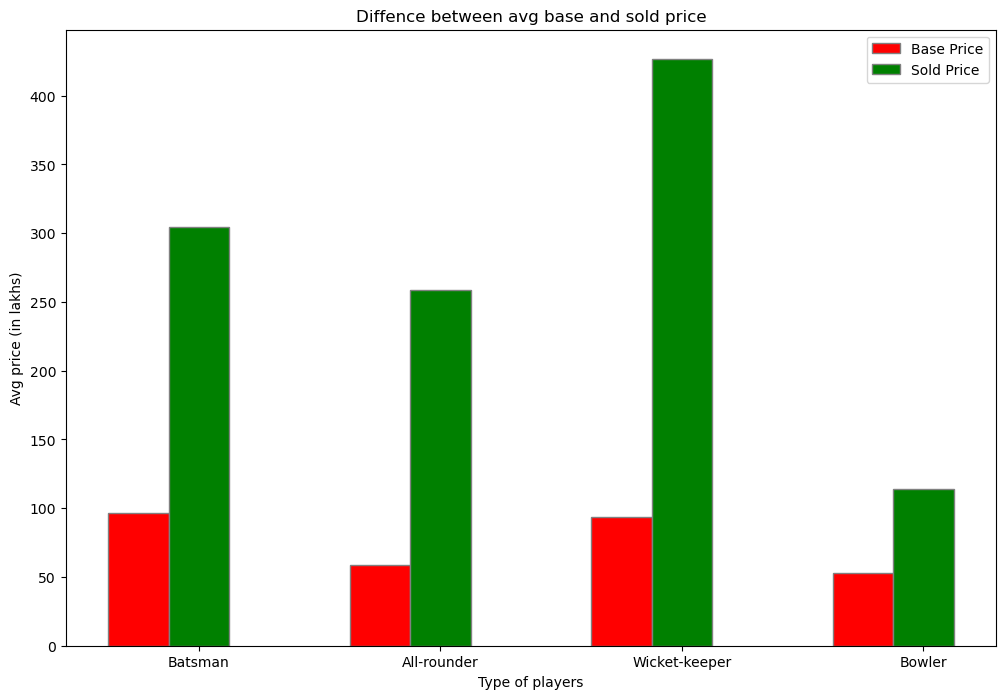

In [7]:
import matplotlib.pyplot as plt
import numpy as np 
# x axis values
x = ['Batsman','All-rounder','Wicket-keeper','Bowler']
# corresponding y axis values
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))  
# plotting the points 
# y1= [y[0][0],y[1][0],y[2][0],y[3][0]]
# y2= [y[0][1],y[1][1],y[2][1],y[3][1]]
# print(y1)
# print(y2)
br1 = np.arange(len(y1))
br2 = [x + barWidth for x in br1]
plt.bar(br1, y1, color ='r', width = barWidth,
        edgecolor ='grey', label ='Base Price')
plt.bar(br2, y2, color ='g', width = barWidth,
        edgecolor ='grey', label ='Sold Price')
plt.xlabel('Type of players')
plt.ylabel('Avg price (in lakhs)')
plt.title('Diffence between avg base and sold price')

plt.xticks([r + barWidth for r in range(4)],x)
plt.legend() 
plt.show()

In [8]:
# conclusion 1) the wicketkeepers gather the most 
# money while getting sold at the auction 
# conclusion 2) the wicketkeepers get the most increase
# in the price hence the competition for them is the most

In [9]:
capped_players=[0,0,0]
uncapped_players=[0,0,0]
for i in data[1:]:
#     print(i[5])
    if i[5]=='Capped':
        capped_players[0]=capped_players[0]+1
        capped_players[1]=capped_players[1]+i[6]
        capped_players[2]=capped_players[2]+i[8]
    if i[5]=='Uncapped':
        uncapped_players[0]=uncapped_players[0]+1
        uncapped_players[1]=uncapped_players[1]+i[6]
        uncapped_players[2]=uncapped_players[2]+i[8]
capped_players[1]=capped_players[1]/capped_players[0]
capped_players[2]=capped_players[2]/capped_players[0]
uncapped_players[1]=uncapped_players[1]/uncapped_players[0]
uncapped_players[2]=uncapped_players[2]/uncapped_players[0]
# print(capped_players)
# print(uncapped_players)

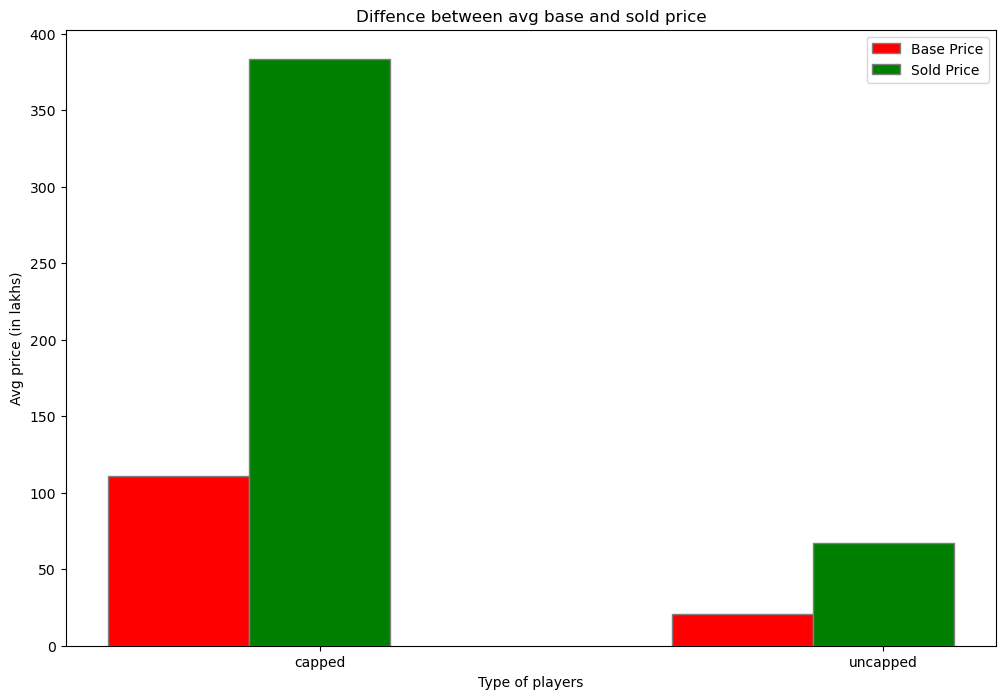

In [10]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
br1 = np.arange(2)
br2 = [x + barWidth for x in br1]
plt.bar(br1,[capped_players[1],uncapped_players[1]] , color ='r', width = barWidth,
        edgecolor ='grey', label ='Base Price')
plt.bar(br2, [capped_players[2],uncapped_players[2]], color ='g', width = barWidth,
        edgecolor ='grey', label ='Sold Price')
plt.xlabel('Type of players')
plt.ylabel('Avg price (in lakhs)')
plt.title('Diffence between avg base and sold price')
plt.xticks([r + barWidth for r in range(2)],['capped','uncapped'])
plt.legend()
plt.show()

In [11]:
# capped players are more popular than uncapped players

In [12]:
dict_={}
for i in data[1:]:
    try:
        dict_[i[7]]=dict_[i[7]]+1
    except:
        dict_[i[7]]=1


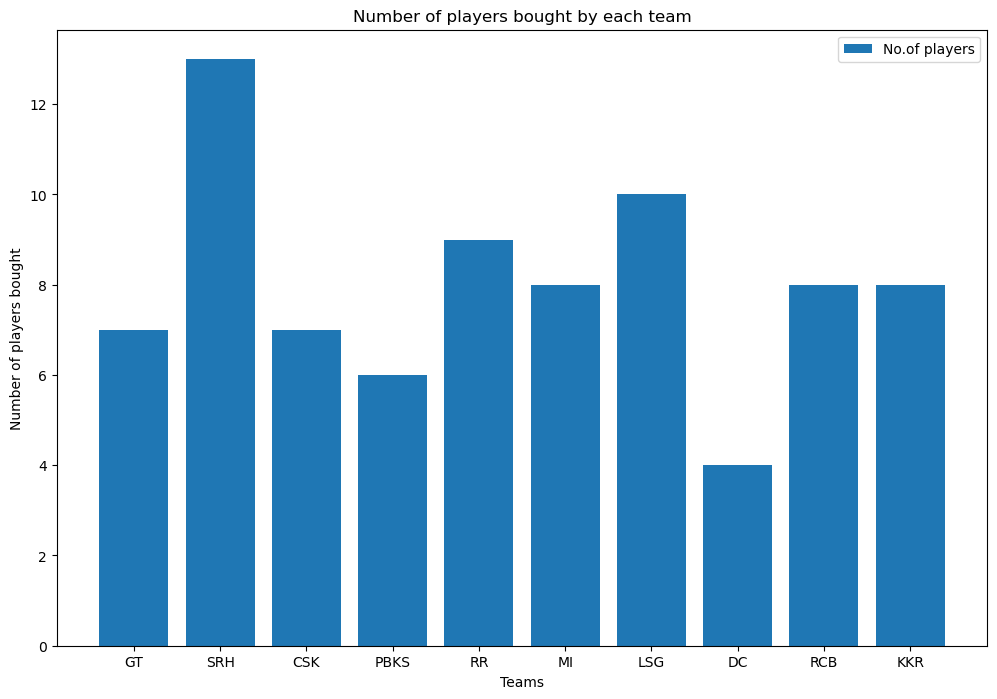

In [13]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
plt.bar(['GT','SRH','CSK','PBKS','RR','MI','LSG','DC','RCB','KKR'],dict_.values(),label="No.of players")
plt.title("Number of players bought by each team")
plt.xlabel("Teams")
plt.ylabel("Number of players bought")
plt.legend()
plt.show()

In [14]:
# the number of players bought by each team is as shown above

In [15]:
# with this data we can predict the auction for the next year
# such as which type of players are going to gather more amount of money
# or which players which have more competition etc.